<a href="https://colab.research.google.com/github/nbrrawal/AvatarGAN/blob/master/Stock_Market_POC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install tensorflow

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
%pip install keras

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.layers import LSTM


In [2]:
#Get the Dataset
df_cipla=pd.read_csv('CIPLA.csv',na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df_cipla.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,CIPLA,EQ,1349.40,1410.0,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
2000-01-04,CIPLA,EQ,1457.35,1537.0,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2000-01-05,CIPLA,EQ,1465.25,1474.0,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
2000-01-06,CIPLA,EQ,1435.05,1434.0,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
2000-01-07,CIPLA,EQ,1355.85,1370.0,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN


In [3]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df_cipla. shape)
print("Null Value Present: ", df_cipla.isnull().values.any())

Dataframe Shape:  (5306, 14)
Null Value Present:  True


<Axes: xlabel='Date'>

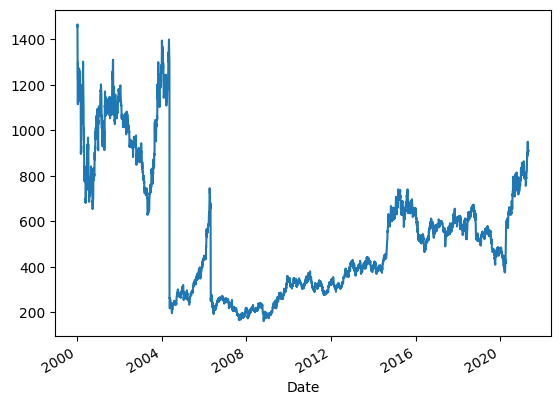

In [4]:
df_cipla['Close'].plot()

In [5]:
output_var = pd.DataFrame(df_cipla['Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

In [6]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_cipla[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df_cipla.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2000-01-03,0.908399,0.941757,0.961128,0.000361
2000-01-04,1.000000,1.000000,1.000000,0.000522
2000-01-05,0.954560,0.953932,0.949416,0.000585
2000-01-06,0.925710,0.925414,0.936965,0.000573
2000-01-07,0.879548,0.892435,0.857899,0.001161


In [7]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [10]:
X_train.shape

(4824, 1, 4)

In [8]:
#Process the data for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)

X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

NameError: ignored

In [ ]:
history = lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

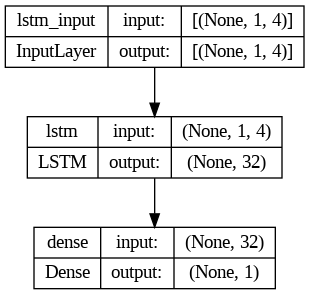

In [ ]:
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [ ]:
y_pred= lstm.predict(X_test)

16/16 [==============================] - 0s 3ms/step


NameError: ignored

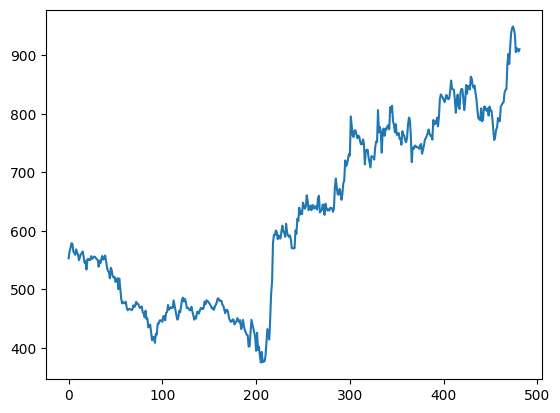

In [23]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [ ]:
#save model
lstm.save('my_model.h5')

# Prediction on new Stock

In [ ]:
df_new_stock.isnull().values.any()

True

<Axes: xlabel='Date'>

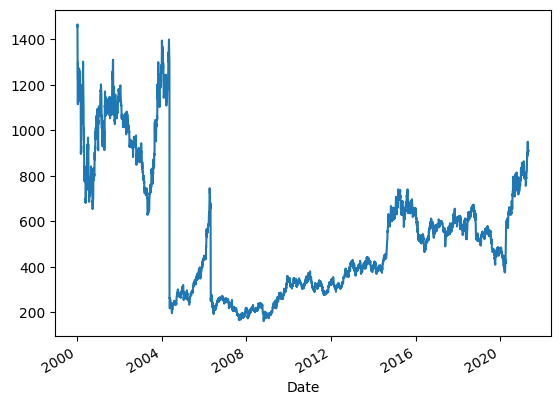

In [17]:
df_cipla['Close'].plot()

<Axes: xlabel='Date'>

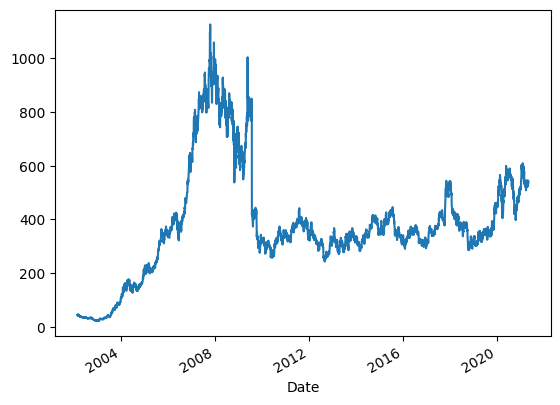

In [16]:
df_new_stock['Close'].plot()

In [32]:
df_new_stock=pd.read_csv("HDFCBANK.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_new_stock[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df_new_stock.index)
print(feature_transform.shape)
trainX = np.array(feature_transform)
X_train = trainX.reshape(feature_transform.shape[0], 1, feature_transform.shape[1])

print(X_train.shape)
y_actual = np.array( df_new_stock["Close"])
print(y_actual)


(5306, 4)
(5306, 1, 4)
[ 170.    173.8   166.95 ... 1476.8  1472.5  1412.3 ]


In [12]:
X_train.shape

(4824, 1, 4)

In [34]:
# returns a compiled model
# identical to the previous one
lstm = load_model('my_model.h5')
y_new_stock= lstm.predict(X_train)

166/166 [==============================] - 1s 2ms/step


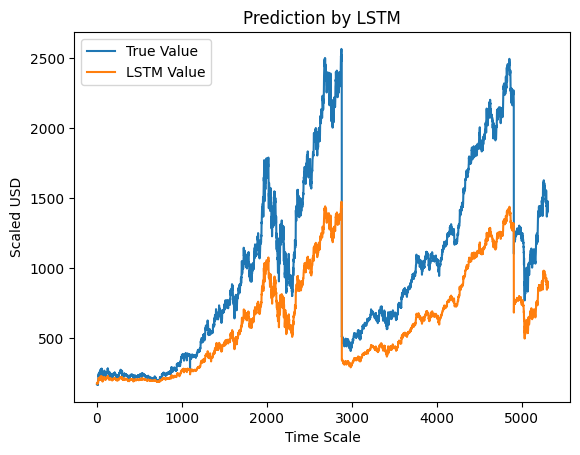

In [35]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_actual, label='True Value')
plt.plot(y_new_stock, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()